In [1]:
!pip install pycaret

  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/eb/43/ec8d59a663e0a1a67196b404ec38ccb0051708bad74a48c80d96c61dd0e5/pycaret-3.2.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 65.0 MB/s eta 0:00:00
  Obtaining dependency information for plotly-resampler>=0.8.3.1 from https://files.pythonhosted.org/packages/08/1d/87d4ed45c26226630bcb0a205ff006c00645cc68977e22c0f6f16a7f5d2b/plotly_resampler-0.9.1-py3-none-any.whl.metadata
  Obtaining dependency information for pmdarima!=1.8.1,<3.0.0,>=1.8.0 from https://files.pythonhosted.org/packages/ec/2b/e7d18360d56396b62781ba4616527af49244d4bed51f0780646fa3953cc8/pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

from pycaret.regression import *



In [3]:
df = pd.read_csv('/kaggle/input/advertisingcsv/Advertising.csv',index_col = 0)
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


# EDA

In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [8]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

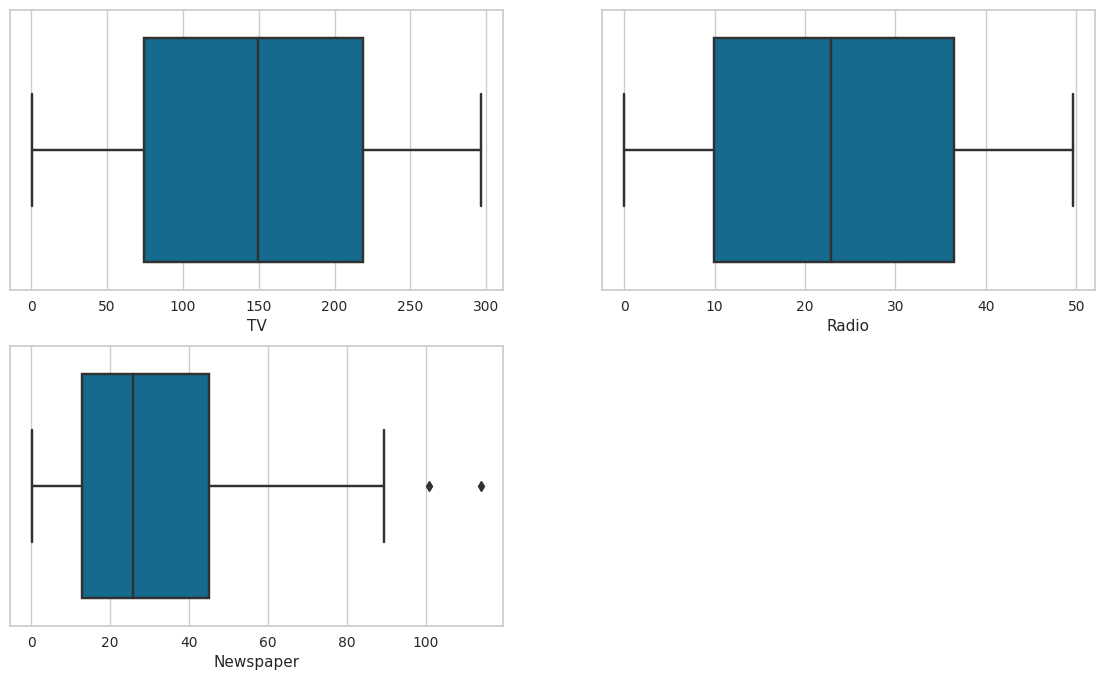

In [9]:
plt.figure(figsize = (14,8))

for i,z in enumerate(['TV', 'Radio', 'Newspaper']):
    plt.subplot(2,2,i+1)
    sns.boxplot(data = df, x = z,orient = 'h')
plt.show()

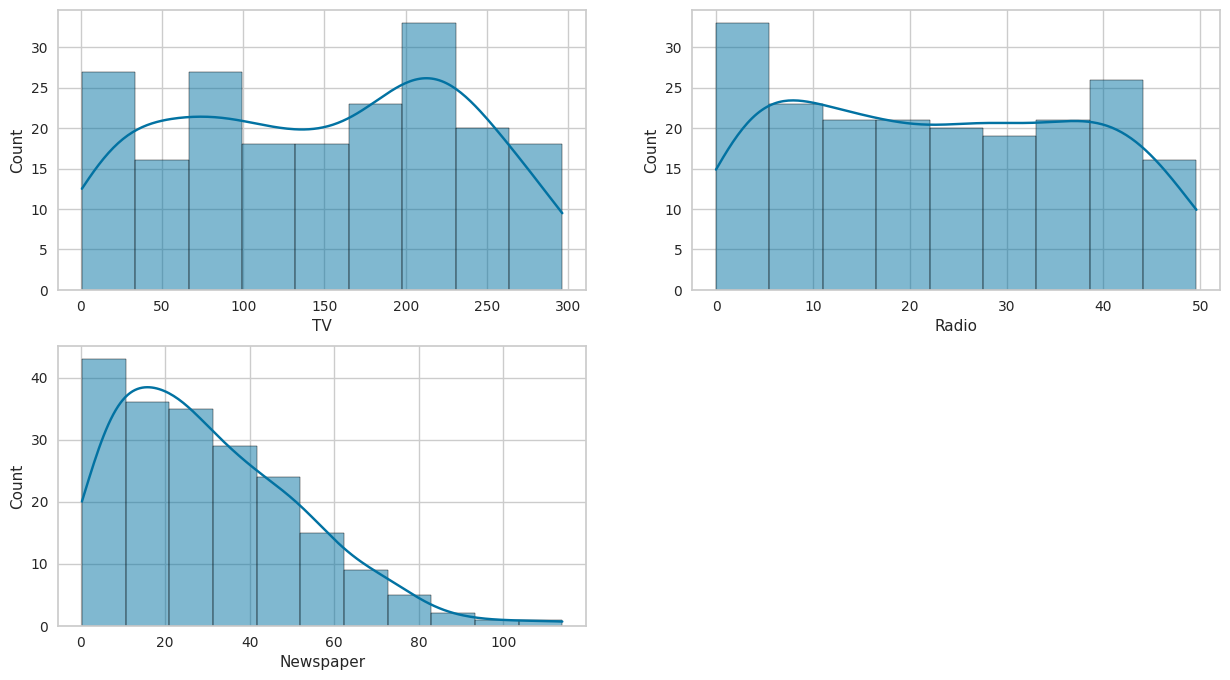

In [10]:
plt.figure(figsize = (15,8))

for i,z in enumerate(['TV', 'Radio', 'Newspaper']):
    plt.subplot(2,2,i+1)
    sns.histplot(data = df, x = z,kde = True)
plt.show()

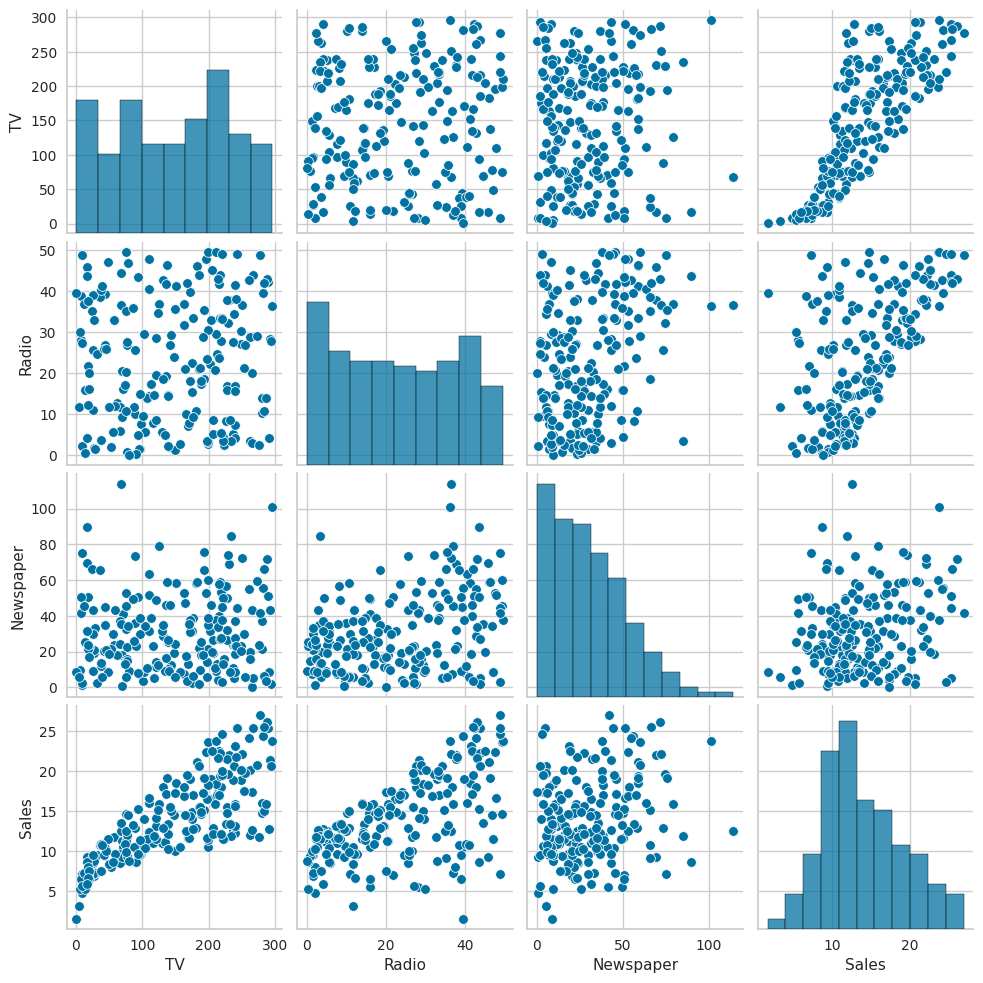

In [11]:
sns.pairplot(df)

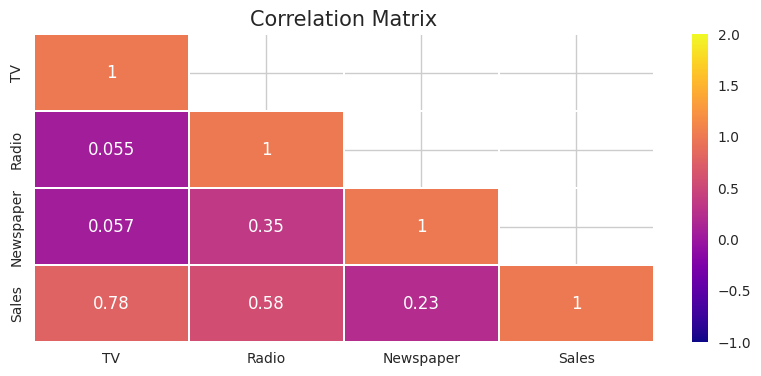

In [12]:
cor =df.corr()
plt.figure(figsize=(10,4))
mask = np.triu(np.ones_like(cor, dtype=bool))
np.fill_diagonal(mask, False)
sns.heatmap(cor, annot=True, mask=mask, vmin=-1, vmax=2,linewidths=0.2, cmap='plasma')
plt.title("Correlation Matrix", fontsize=15)
plt.show()

# Model Building

In [13]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [14]:
y = df['Sales']
X = df.drop(columns = "Sales")

In [15]:
setup(data=X,target=y)
best_model=compare_models()

,Description,Value
0,Session id,3673
1,Target,Sales
2,Target type,Regression
3,Original data shape,"(200, 4)"
4,Transformed data shape,"(200, 4)"
5,Transformed train set shape,"(140, 4)"
6,Transformed test set shape,"(60, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4279,0.4046,0.5658,0.9847,0.0627,0.0548,0.0840
catboost,CatBoost Regressor,0.5142,0.7657,0.7762,0.9708,0.0839,0.0701,0.9780
rf,Random Forest Regressor,0.6483,0.7401,0.8177,0.9701,0.0822,0.0735,0.1130
gbr,Gradient Boosting Regressor,0.6138,0.7311,0.8085,0.9689,0.0785,0.0701,0.0360
xgboost,Extreme Gradient Boosting,0.6700,0.7707,0.8556,0.9666,0.0846,0.0738,0.0380
lightgbm,Light Gradient Boosting Machine,0.8014,1.4319,1.1289,0.9444,0.1099,0.0938,0.1590
ada,AdaBoost Regressor,0.9551,1.4185,1.1691,0.9368,0.1123,0.1030,0.0500
dt,Decision Tree Regressor,0.9721,1.6291,1.2543,0.9293,0.1281,0.0977,0.0160
knn,K Neighbors Regressor,1.3341,3.2042,1.7204,0.8700,0.1319,0.1247,0.0180
lasso,Lasso Regression,1.3471,3.3514,1.7686,0.8660,0.1668,0.1544,0.0170


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [16]:
Et = create_model('et')
bagged_Et = ensemble_model(Et, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3320,0.1549,0.3936,0.9950,0.0271,0.0240
1,0.4731,0.3351,0.5789,0.9831,0.0477,0.0426
2,0.5306,0.4480,0.6693,0.9902,0.0391,0.0354
3,0.3880,0.2160,0.4647,0.9922,0.0316,0.0274
4,0.3727,0.1936,0.4399,0.9800,0.0384,0.0339
5,0.3282,0.1446,0.3803,0.9947,0.0313,0.0275
6,0.4812,0.3344,0.5783,0.9763,0.0518,0.0431
7,0.7462,1.9075,1.3811,0.9513,0.2842,0.2509
8,0.3968,0.2206,0.4697,0.9888,0.0451,0.0393


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3204,0.1936,0.4400,0.9937,0.0277,0.0231
1,0.4779,0.2792,0.5284,0.9860,0.0459,0.0439
2,0.5795,0.6035,0.7768,0.9867,0.0423,0.0367
3,0.3819,0.2152,0.4639,0.9923,0.0301,0.0267
4,0.4302,0.2820,0.5310,0.9708,0.0450,0.0385
5,0.3447,0.1683,0.4103,0.9938,0.0328,0.0284
6,0.4551,0.2991,0.5469,0.9788,0.0517,0.0419
7,0.8899,2.5698,1.6031,0.9344,0.3113,0.2931
8,0.4854,0.2850,0.5339,0.9855,0.0528,0.0483


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [17]:
evaluate_model(bagged_Et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [18]:
predict_model(bagged_Et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bagging Regressor,0.4284,0.3283,0.5729,0.9877,0.0577,0.0384


,TV,Radio,Newspaper,Sales,prediction_label
129,220.300003,49.000000,3.200000,24.700001,23.2139
1,230.100006,37.799999,69.199997,22.100000,21.6364
119,125.699997,36.900002,79.199997,15.900000,16.1588
52,100.400002,9.600000,3.600000,10.700000,10.7282
29,248.800003,27.100000,22.900000,18.900000,19.5252
187,139.500000,2.100000,26.600000,10.300000,10.4779
23,13.200000,15.900000,49.599998,5.600000,6.5164
147,240.100006,7.300000,8.700000,13.200000,13.0207
86,193.199997,18.400000,65.699997,15.200000,15.1342
115,78.199997,46.799999,34.500000,14.600000,14.0350
